# US Cafe' Stores Sales Analysis
## Table of Contents

### This script contains the following:

#### - Importing your libraries and data
#### - Subsetting, wrangling, and cleaning time-series data
#### - Time series analysis: decomposition
#### - Testing for stationarity
#### - Stationarizing the US Cafe' Stores Sales Data

### Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'JVCwxdxt6Nts735ZzsAZ'

In [3]:
#Create path
path = r'/Users/rusamijan/04-2023 US Stores Sales Analysis'

In [96]:
#Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_cleaned.pkl'))

In [97]:
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-01-04,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-01-07,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,2010-01-11,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,2010-01-12,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2011-01-07,Coffee,Columbian,Regular


In [98]:
df_nasdaq= pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Variety Chain Store Sales.csv'), index_col = False)

In [99]:
df_nasdaq.shape

(300, 2)

In [100]:
df_nasdaq.columns

Index(['DATE', 'VALUE'], dtype='object')

In [101]:
df_nasdaq.dtypes

DATE      object
VALUE    float64
dtype: object

In [103]:
type(df_nasdaq)

pandas.core.frame.DataFrame

In [104]:
df_nasdaq['DATE'] = pd.to_datetime(df_nasdaq['DATE'])

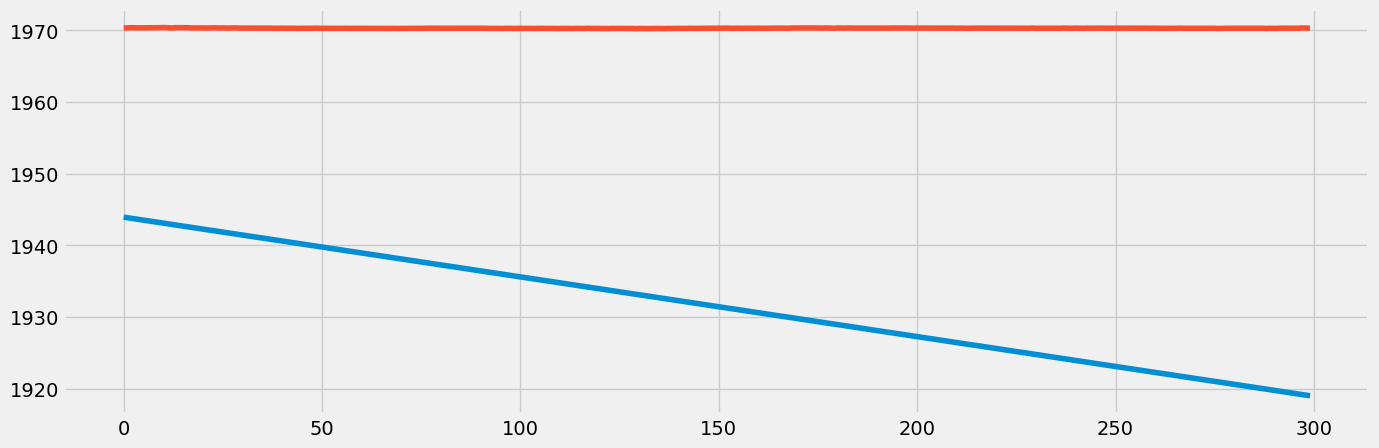

In [105]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_nasdaq)

In [106]:
df_nasdaq.head()

,DATE,VALUE
0,1943-12-01,105.4
1,1943-11-01,123.4
2,1943-10-01,127.2
3,1943-09-01,121.2
4,1943-08-01,120.4


### Create a subset from the data.

In [107]:
df_nasdaq.head()

,DATE,VALUE
0,1943-12-01,105.4
1,1943-11-01,123.4
2,1943-10-01,127.2
3,1943-09-01,121.2
4,1943-08-01,120.4


In [108]:
df_nasdaq.head()

,DATE,VALUE
0,1943-12-01,105.4
1,1943-11-01,123.4
2,1943-10-01,127.2
3,1943-09-01,121.2
4,1943-08-01,120.4


In [109]:
df_nasdaq = df_nasdaq.groupby(by=['DATE']).sum().reset_index()

In [110]:
df_nasdaq.head()

,DATE,VALUE
0,1919-01-01,106.8
1,1919-02-01,108.0
2,1919-03-01,117.4
3,1919-04-01,101.9
4,1919-05-01,106.0


In [111]:
df_nasdaq.set_index(keys=['DATE'], drop=True, inplace=True)

In [112]:
df_nasdaq.head()

,VALUE
DATE,
1919-01-01,106.8
1919-02-01,108.0
1919-03-01,117.4
1919-04-01,101.9
1919-05-01,106.0


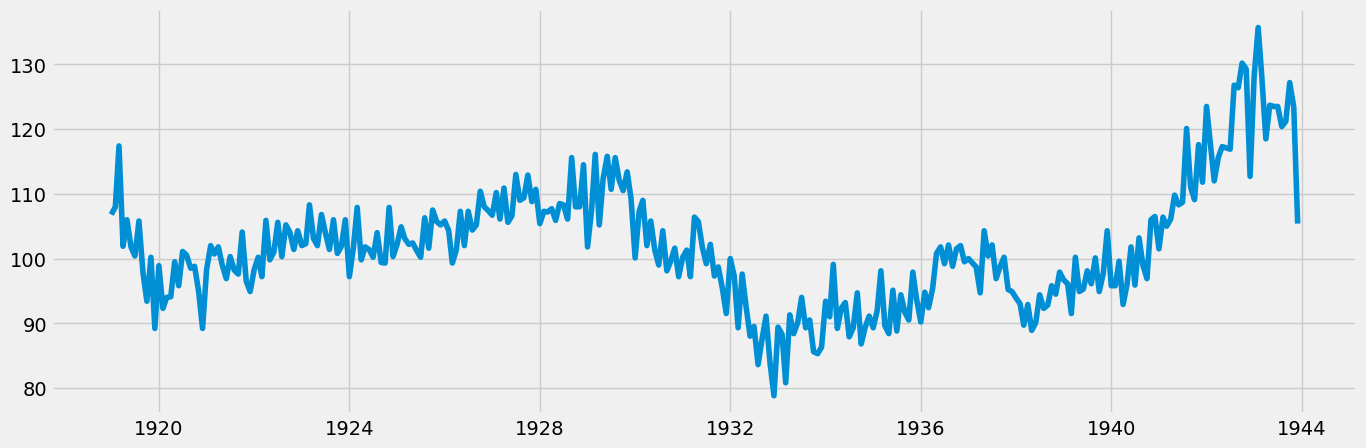

In [113]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_nasdaq)

In [114]:
### Sort values
df_nasdaq.sort_values(by='DATE', axis=0, inplace=True)

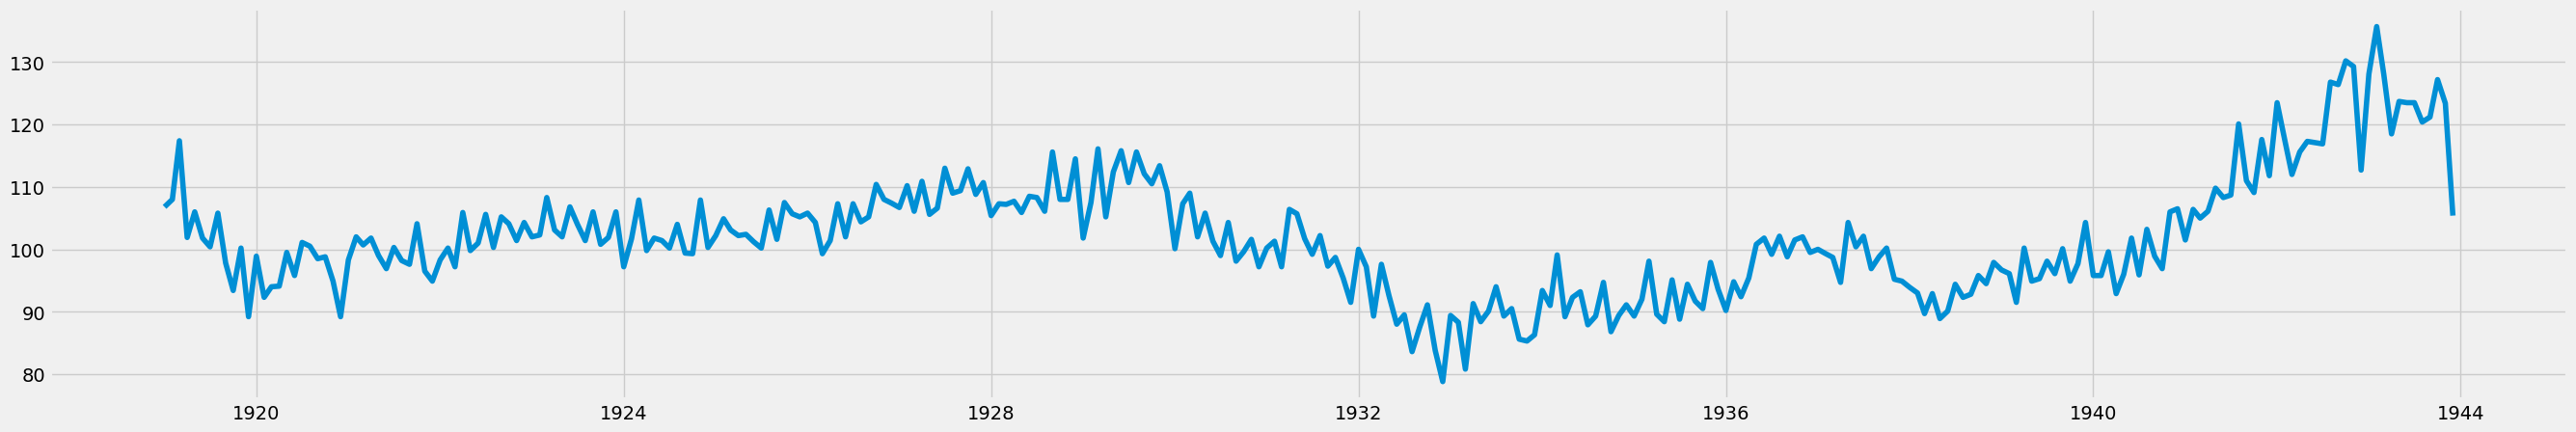

In [115]:
# Plot the data using matplotlib
plt.figure(figsize=(30,5), dpi=100)
plt.plot(df_nasdaq)

### Time-series analysis: decomposition

In [116]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_nasdaq, model='additive')

In [117]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

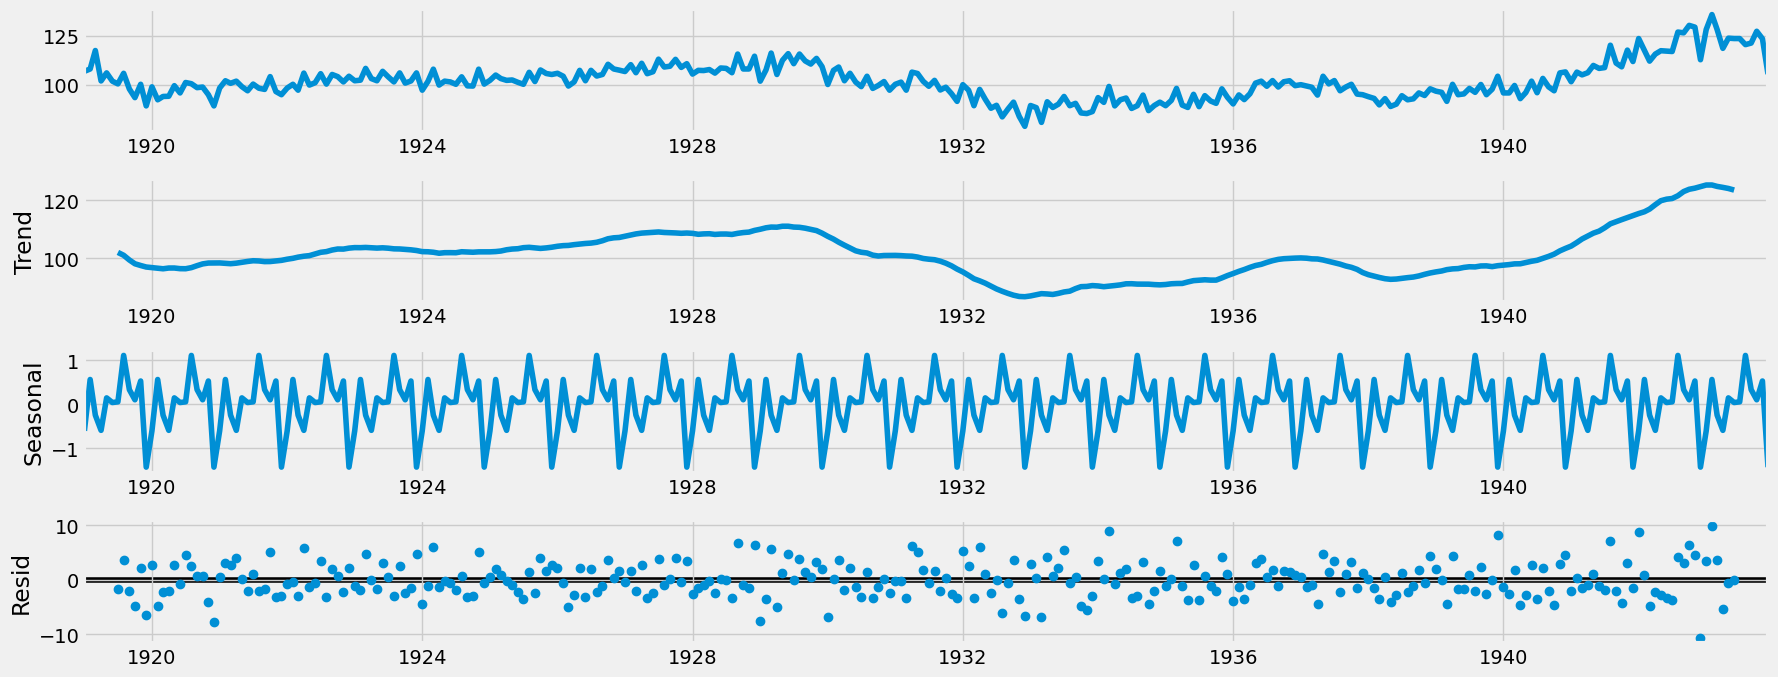

In [85]:
# Plot the separate components

decomposition.plot()
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data_sub['Total Sales'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data_sub['Total Sales'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Testing for stationarity

In [119]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_nasdaq['VALUE'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.029805
p-value                          0.273659
Number of Lags Used             16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64


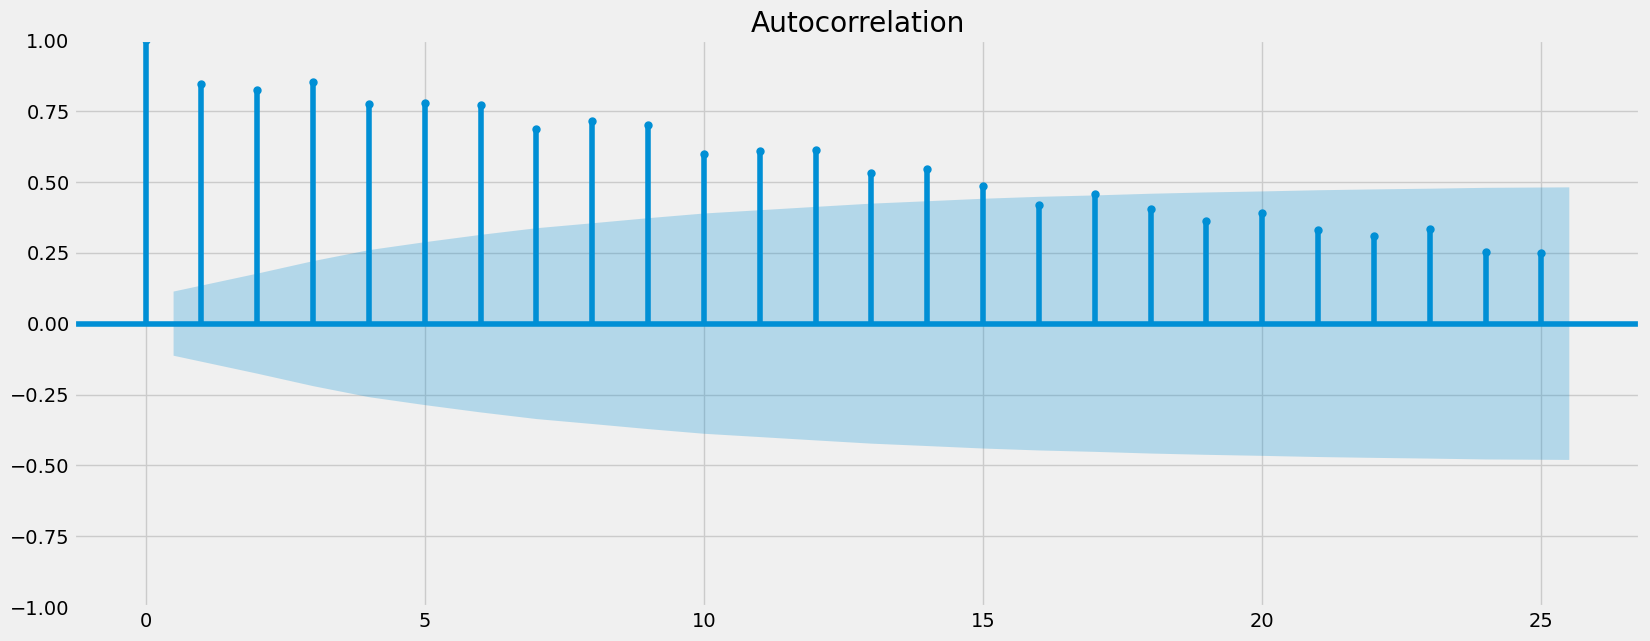

In [120]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_nasdaq)
plt.show()

### Stationarizing the Adidas Sales

In [121]:
data_diff =df_nasdaq - df_nasdaq.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [122]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [123]:
data_diff.head()

,VALUE
DATE,
1919-02-01,1.2
1919-03-01,9.4
1919-04-01,-15.5
1919-05-01,4.1
1919-06-01,-4.2


In [124]:
data_diff.columns

Index(['VALUE'], dtype='object')

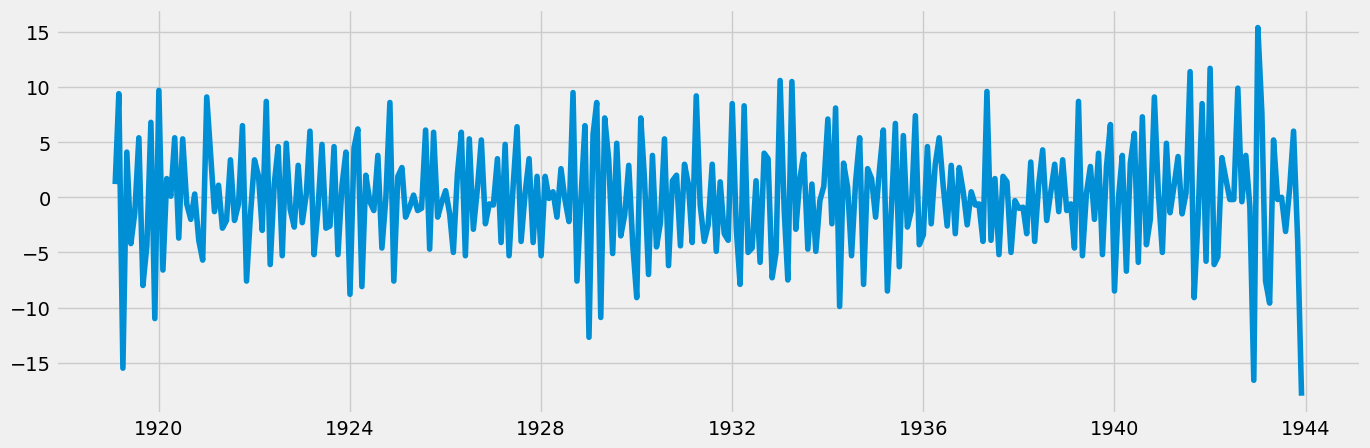

In [125]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [126]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.814119
p-value                          0.002766
Number of Lags Used             16.000000
Number of Observations Used    282.000000
Critical Value (1%)             -3.453754
Critical Value (5%)             -2.871844
Critical Value (10%)            -2.572261
dtype: float64


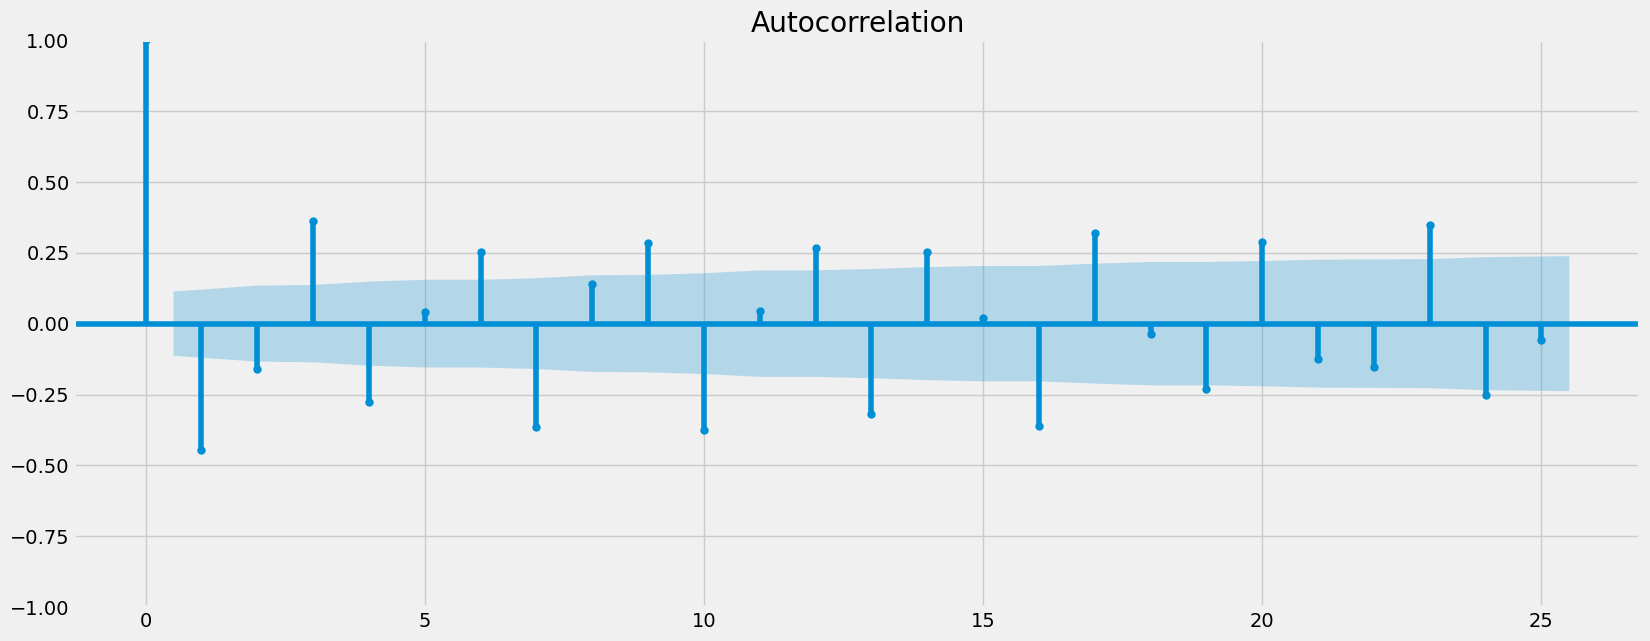

In [127]:
plot_acf(data_diff)
plt.show()

Test Statistis= -3.81 < Critical value=-3.45
The null hypothesis is rejected. the series is stationary.

## US Cafe' Stores Sales Data

In [128]:
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-01-04,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-01-07,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,2010-01-11,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,2010-01-12,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2011-01-07,Coffee,Columbian,Regular


In [129]:
df.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

In [130]:
#drop columns
df_1=df.drop(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
        'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId','Product Type', 'Product', 'Type'], axis = 1, inplace = True)

In [131]:
df.head()

,Sales,Date
0,292.0,2010-01-04
1,225.0,2010-01-07
2,325.0,2010-01-11
3,289.0,2010-01-12
4,223.0,2011-01-07


In [132]:
#Move last Column to First Column
new_cols = ["Date","Sales"]
df=df[new_cols]

In [133]:
df.head()

,Date,Sales
0,2010-01-04,292.0
1,2010-01-07,225.0
2,2010-01-11,325.0
3,2010-01-12,289.0
4,2011-01-07,223.0


In [134]:
df.dtypes

Date     datetime64[ns]
Sales           float64
dtype: object

In [135]:
type(df)

pandas.core.frame.DataFrame

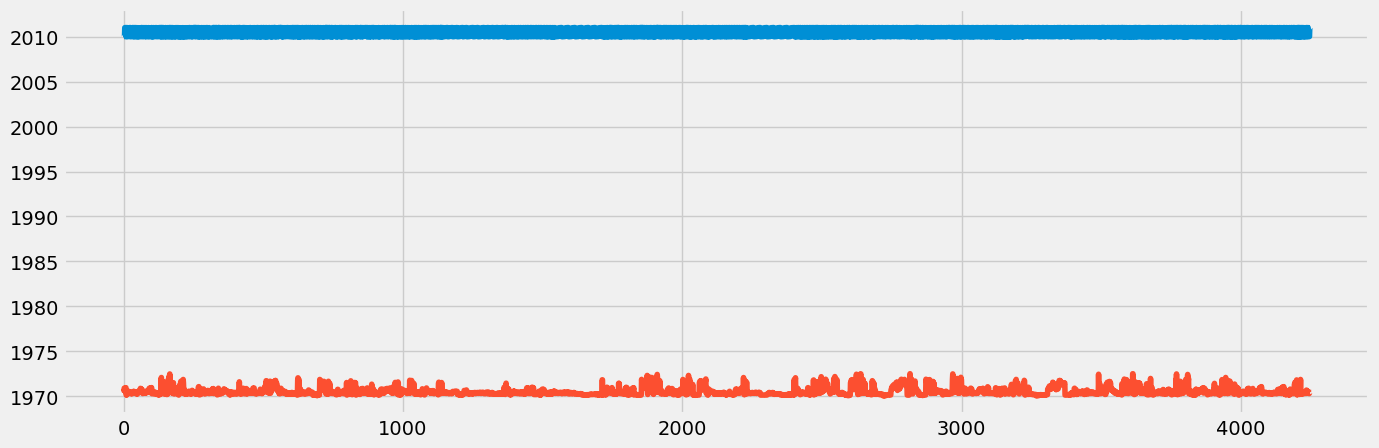

In [136]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

### Create a subset from the data.

In [153]:
df.shape

(4248, 2)

In [155]:
data_sub = df.loc[(df['Date'] >= '2010-01-01') & (df['Date'] < '2011-01-01')]

In [156]:
data_sub.shape

(2124, 2)

In [157]:
data_sub.head()

,Date,Sales
0,2010-01-04,292.0
1,2010-01-07,225.0
2,2010-01-11,325.0
3,2010-01-12,289.0
9,2010-01-06,51.0


In [159]:
data_sub.set_index(keys=['Date'], drop=True, inplace=True)

In [160]:
data_sub.head()

,Sales
Date,
2010-01-04,292.0
2010-01-07,225.0
2010-01-11,325.0
2010-01-12,289.0
2010-01-06,51.0


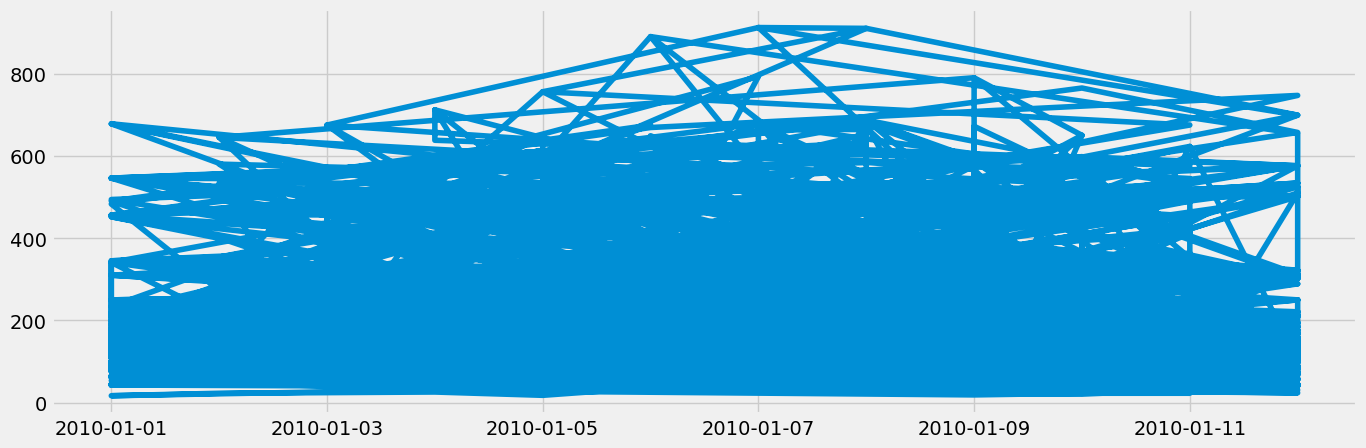

In [161]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [163]:
### Sort values
data_sub.sort_values(by='Date', axis=0, inplace=True)

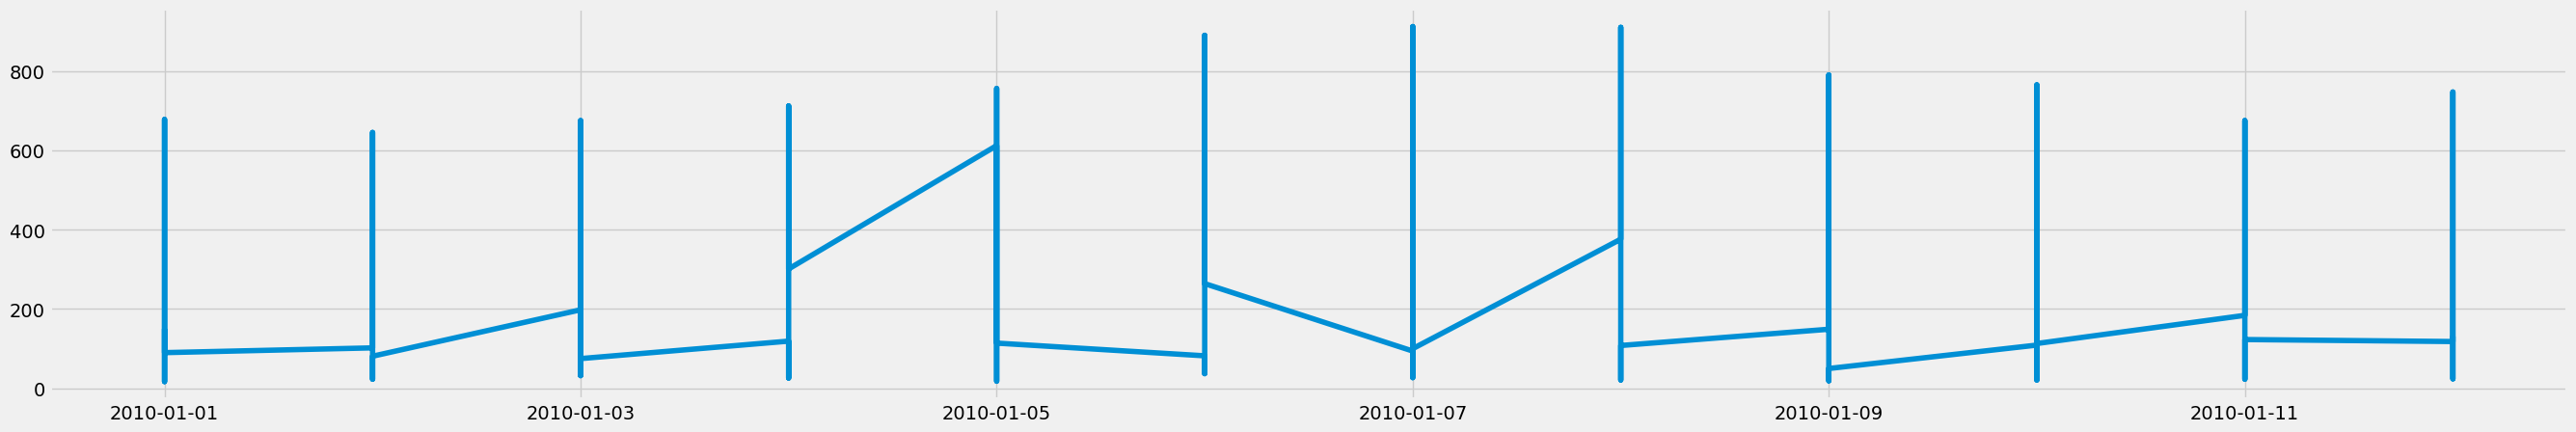

In [164]:
# Plot the data using matplotlib
plt.figure(figsize=(30,5), dpi=100)
plt.plot(data_sub)

### Time-series analysis: decomposition

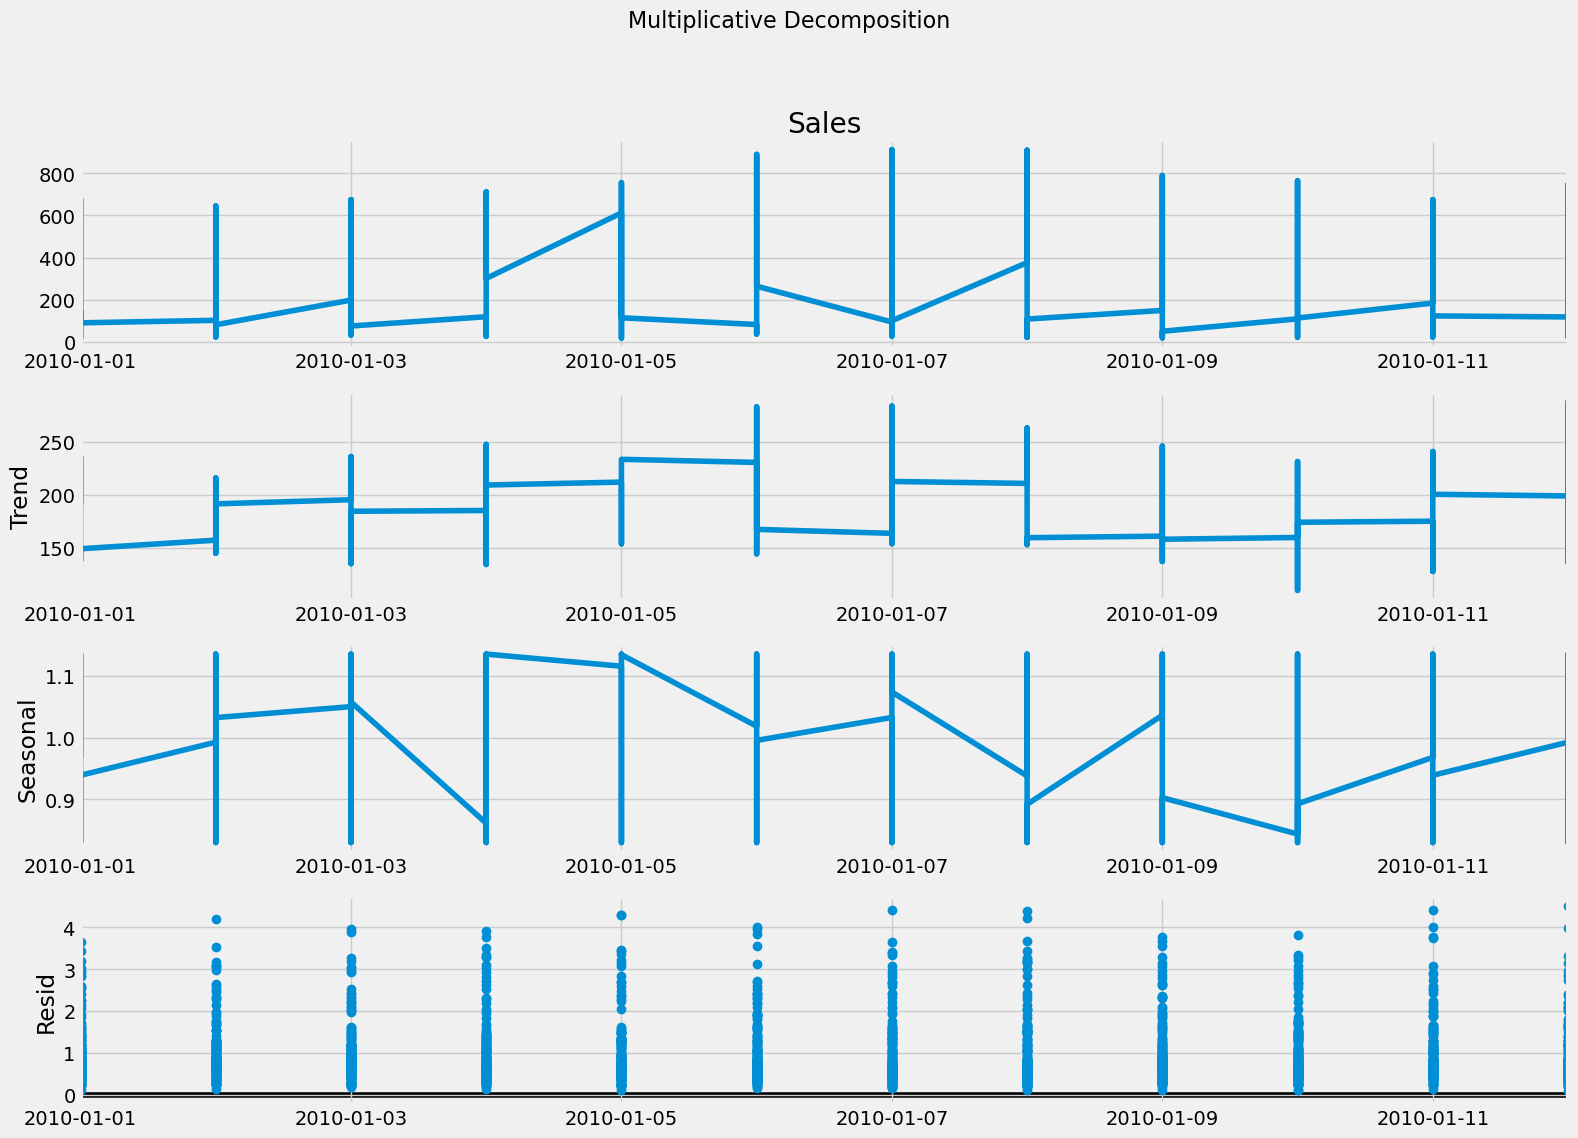

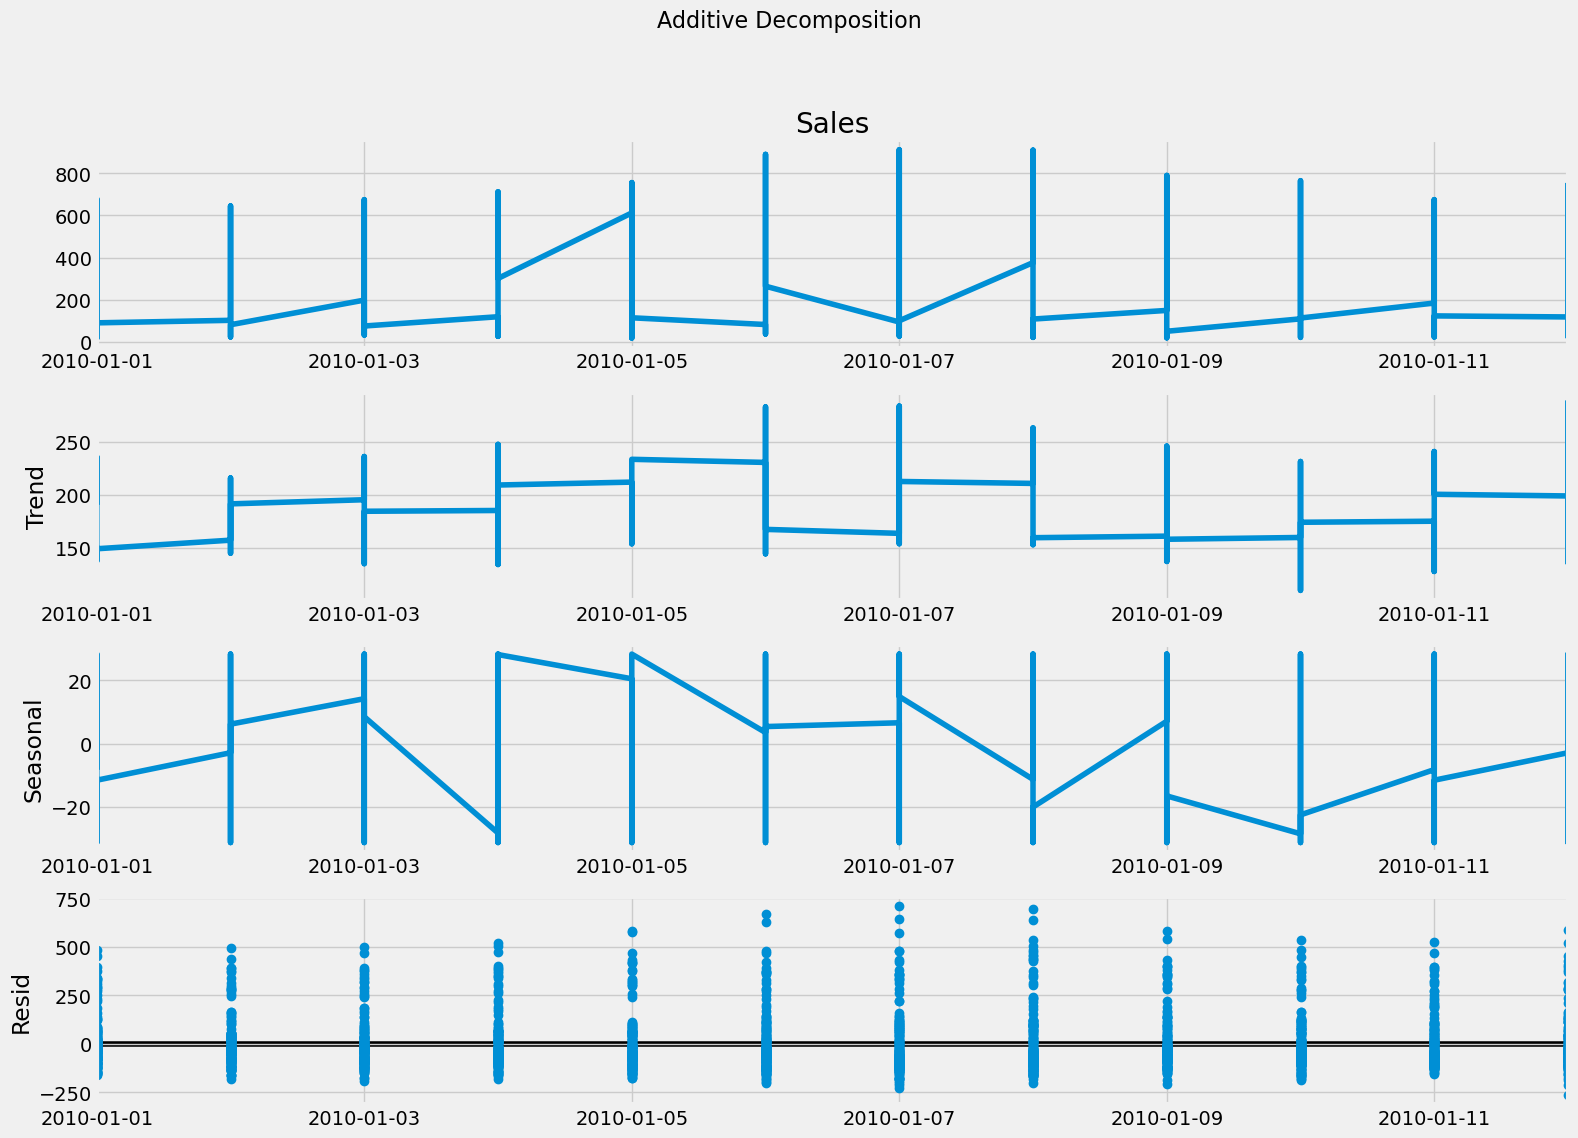

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data_sub['Sales'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data_sub['Sales'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Testing for stationarity

In [166]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Sales'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.412201e+01
p-value                        2.415655e-26
Number of Lags Used            1.000000e+01
Number of Observations Used    2.113000e+03
Critical Value (1%)           -3.433449e+00
Critical Value (5%)           -2.862909e+00
Critical Value (10%)          -2.567499e+00
dtype: float64


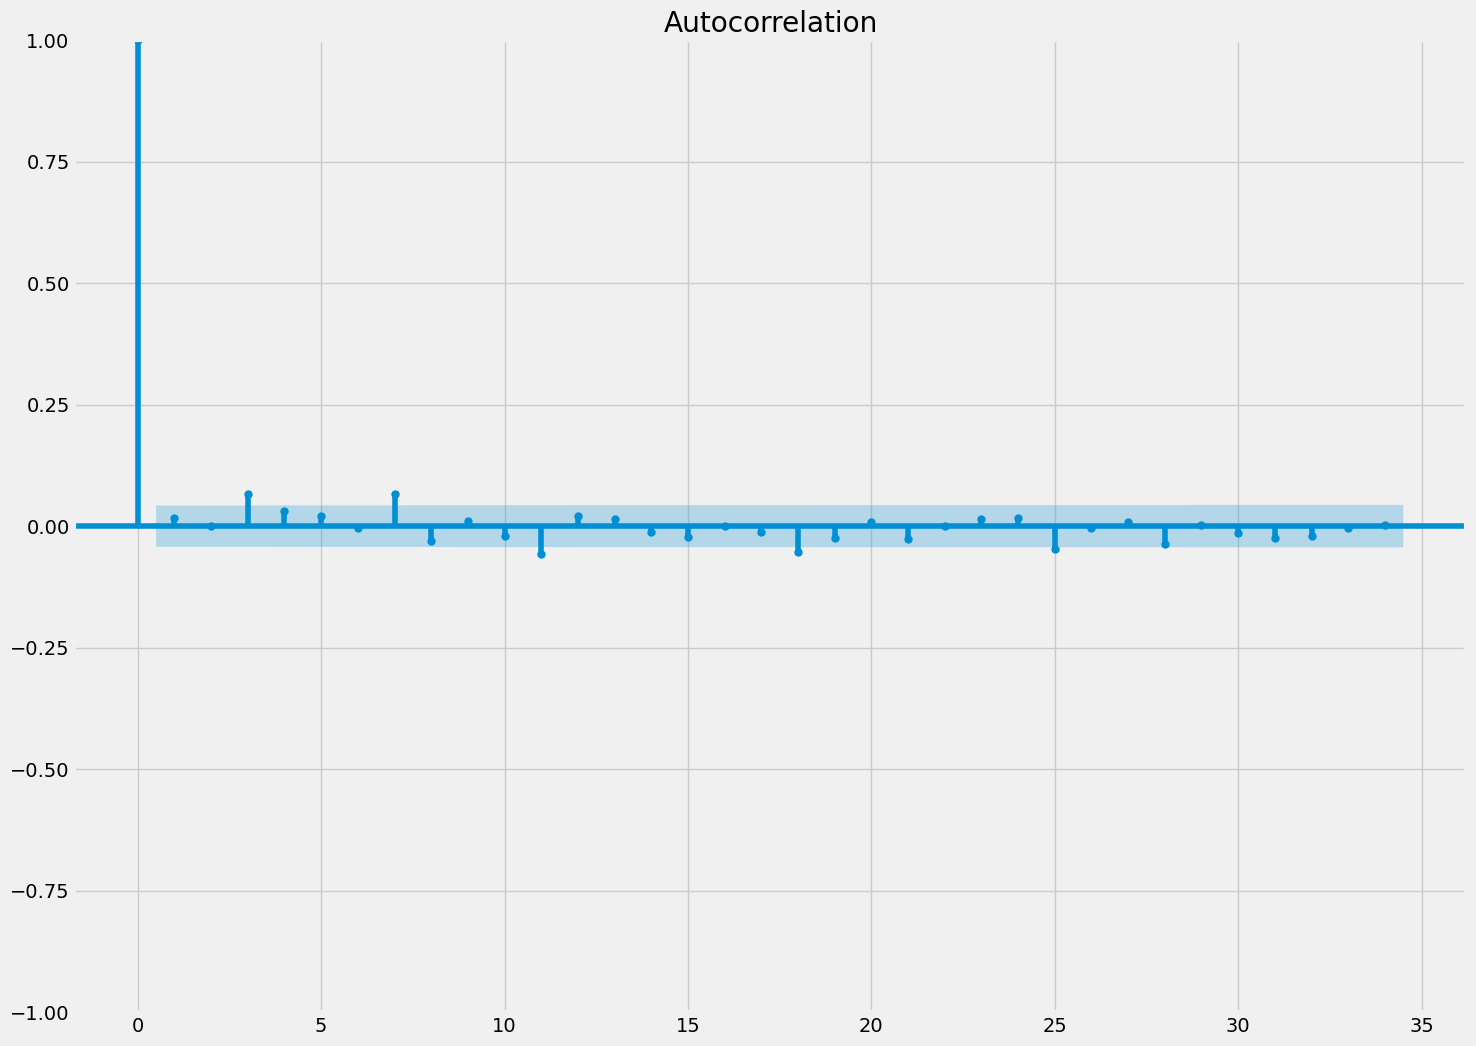

In [167]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### Stationarizing the Adidas Sales

In [168]:
data_diff_1 = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [169]:
data_diff_1.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [170]:
data_diff_1.head()

,Sales
Date,
2010-01-01,-107.0
2010-01-01,117.0
2010-01-01,-40.0
2010-01-01,-8.0
2010-01-01,6.0


In [171]:
data_diff_1.columns

Index(['Sales'], dtype='object')

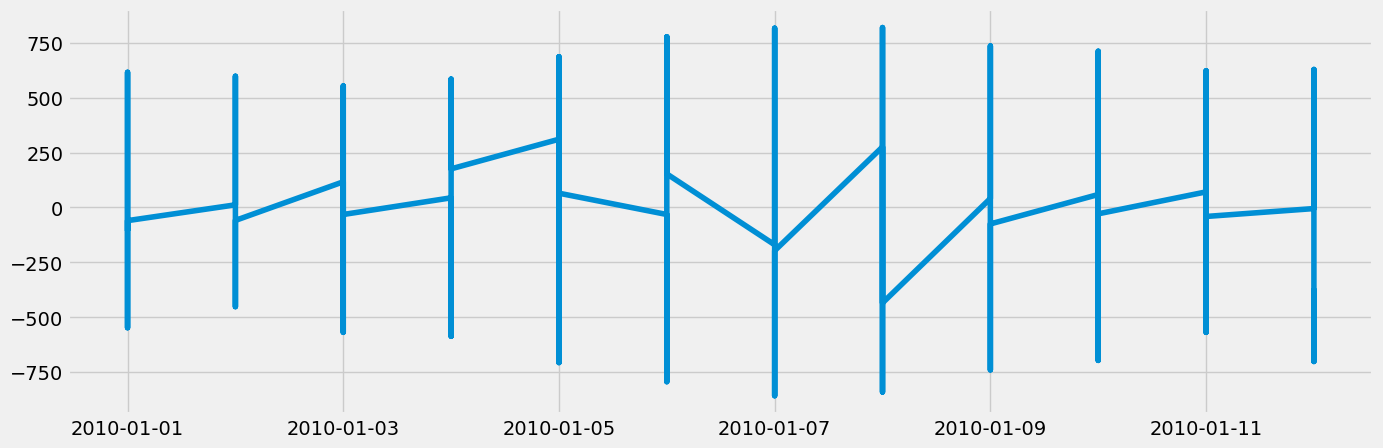

In [172]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_1)

In [173]:
dickey_fuller(data_diff_1)

Dickey-Fuller Stationarity test:
Test Statistic                -1.530985e+01
p-value                        4.200960e-28
Number of Lags Used            2.500000e+01
Number of Observations Used    2.097000e+03
Critical Value (1%)           -3.433472e+00
Critical Value (5%)           -2.862919e+00
Critical Value (10%)          -2.567504e+00
dtype: float64


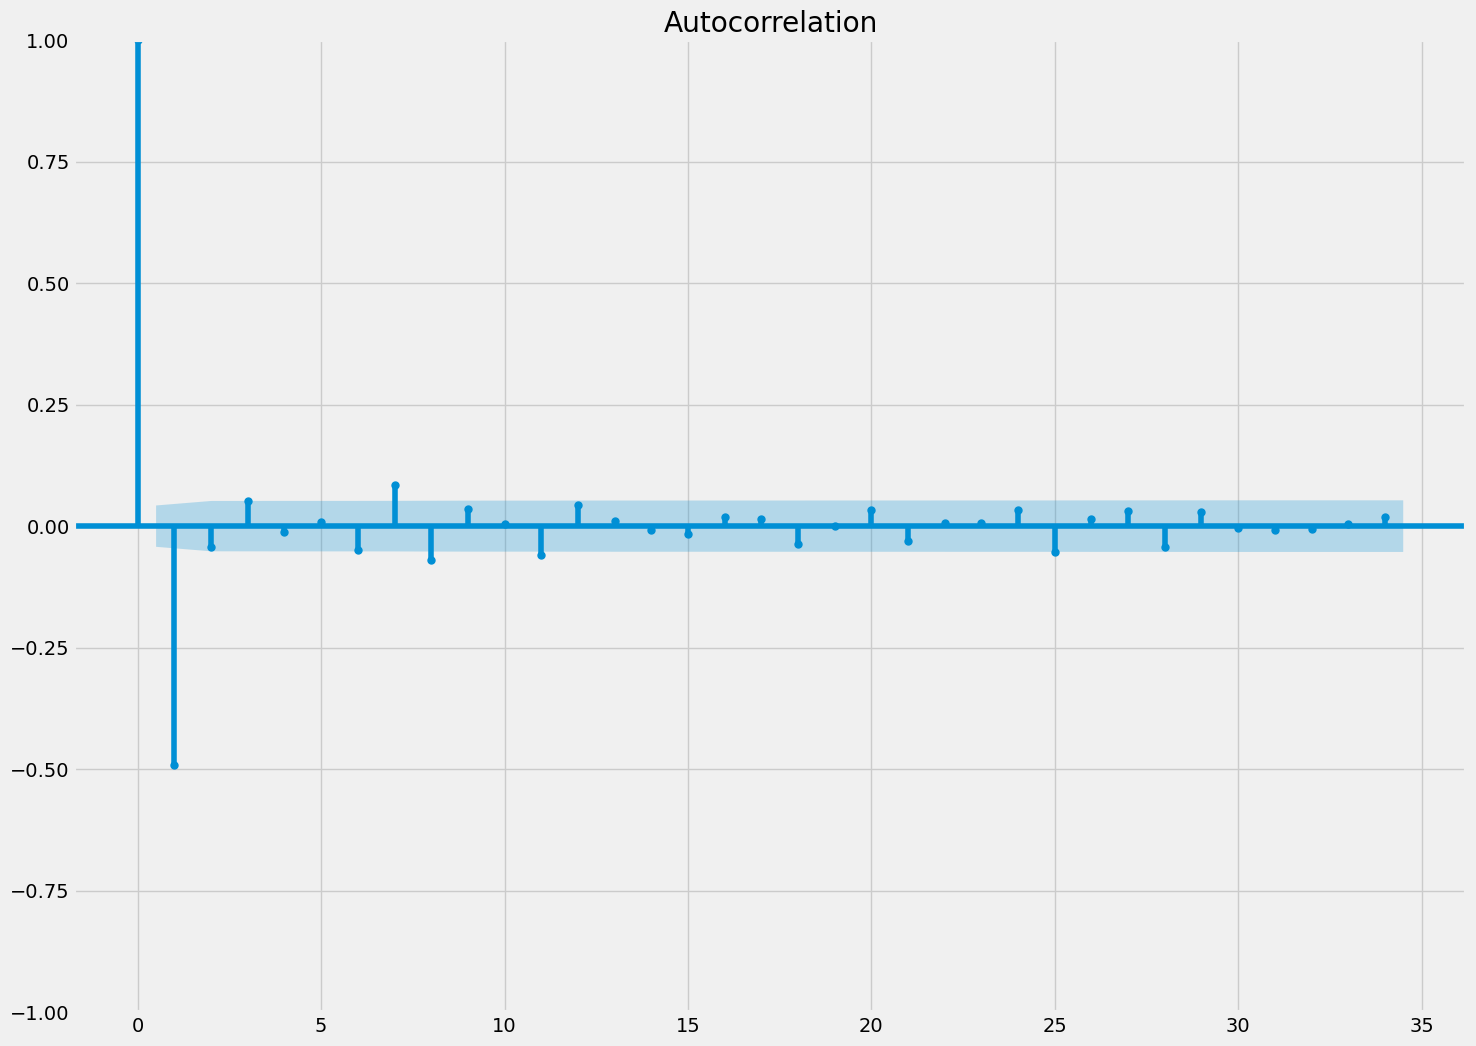

In [174]:
plot_acf(data_diff_1)
plt.show()

In [ ]:
Test Statistis= -1.53 < Critical value=-3.43
The null hypothesis is rejected. the series is stationary.